In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---

# Gather

---

In [2]:
# FileName Definitions
archive_file = 'twitter_archive_enhanced.csv'
predict_file = 'image_predictions.tsv'
json_file = 'tweet_json.txt'
error_file = 'tweet_json_errors.txt'
final_file = 'twitter_archive_master.csv'

# API Access tokens...
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
OAUTH_TOKEN = ""
OAUTH_TOKEN_SECRET = ""

### Given File

In [3]:
# Setting up the DataFrame...
tw_archive = pd.read_csv(archive_file)

### File Downloaded Programmatically

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(predict_file, mode='wb') as file:
    file.write(response.content)

    
# Setting up the DataFrame...
predictions = pd.read_csv(predict_file, sep='\t')

### File Constructed Via API

In [5]:
tweets = []
error_tweets = []

# Avoid the non-intencional API call...
if not os.path.isfile(json_file):

    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
    api = tweepy.API(auth)

    for tweet_id in tw_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)                
        except tweepy.TweepError as e:
            error_tweets.append(json.dumps({'id':tweet_id, 'code':e.api_code, 'text':e.response.text}, separators=(',',':')))
            continue
        else:
            tweets.append(json.dumps(tweet._json, separators=(',', ':')))
            print('Got tweet', tweet_id, 'Tweets so far:', len(tweets), 'Errors:', len(error_tweets))

    # Writing the "json_file" with the JSON strings successfully returned from Twitter API
    with open(json_file, mode='a') as file:
        file.writelines('\n'.join(tweets))

    # Writing the "error_file" with the tweet ID's that were not returned by the API  
    with open(error_file, mode='a') as file:
        file.writelines('\n'.join(error_tweets))
    

# Setting up the DataFrame...
tw_extra_info = pd.read_json(json_file, lines=True, encoding='utf-8')

---

# Assess

---

In [6]:
# Setting some pandas options for better visualization...
pd.set_option('display.max_colwidth', -1)
pd.set_option('precision', 10)

---

## Table `tw_archive`

---

In [7]:
tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [8]:
tw_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
600,798673117451325440,NaN,NaN,2016-11-15 23:44:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: I shall call him squishy and he shall be mine, and he shall be my squishy. 13/10 https://t.co/WId5lxNdPH",6.7550107596e+17,4196983835.0,2015-12-12 02:23:01 +0000,"https://twitter.com/dog_rates/status/675501075957489664/photo/1,https://twitter.com/dog_rates/status/675501075957489664/photo/1",13,10,None,None,None,None,None
452,818614493328580609,NaN,NaN,2017-01-10 00:24:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bear. He's a passionate believer of the outdoors. Leaves excite him. 12/10 would hug softly https://t.co/FOF0hBDxP8,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/818614493328580609/photo/1,https://twitter.com/dog_rates/status/818614493328580609/photo/1,https://twitter.com/dog_rates/status/818614493328580609/photo/1,https://twitter.com/dog_rates/status/818614493328580609/photo/1",12,10,Bear,None,None,None,None
800,772615324260794368,NaN,NaN,2016-09-05 02:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Gromit. He's pupset because there's no need to beware of him. Just wants a pettin. 10/10 https://t.co/eSvz4EapHH,7.6522209863e+17,4196983835.0,2016-08-15 16:22:20 +0000,"https://twitter.com/dog_rates/status/765222098633691136/photo/1,https://twitter.com/dog_rates/status/765222098633691136/photo/1",10,10,Gromit,None,None,None,None
2265,667534815156183040,NaN,NaN,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667534815156183040/photo/1,8,10,Frank,None,None,None,None
1037,744709971296780288,NaN,NaN,2016-06-20 01:54:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harvey. He's stealthy af. 10/10 would do my best to pet https://t.co/zAzaRT6NnT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744709971296780288/photo/1,10,10,Harvey,None,None,None,None
2025,671882082306625538,NaN,NaN,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Batdog. He's sleeping now but when he wakes up he'll fight crime and such. Great tongue. 11/10 for Batdog https://t.co/Clg16EVy9O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671882082306625538/photo/1,11,10,Batdog,None,None,None,None
208,852311364735569921,NaN,NaN,2017-04-13 00:03:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wiggles. She would like you to spot her. Probably won't need your help but just in case. 13/10 powerful as h*ck https://t.co/2d370P0OEg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852311364735569921/photo/1,13,10,Wiggles,None,None,None,None
1881,675003128568291329,NaN,NaN,2015-12-10 17:24:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Laela. She's adorable. Magnificent eyes. But I don't see a seat belt. Insubordinate.. and churlish. Still 12/10 https://t.co/pCGDgLkLo6,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/675003128568291329/photo/1,https://twitter.com/dog_rates/status/675003128568291329/photo/1",12,10,Laela,None,None,None,None
1859,675497103322386432,NaN,NaN,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Reggie. He's going for the world record. Must concentrate. Focus up pup. 11/10 w

In [9]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<font color='blue'>
    `timestamp` column read as object could be a quality issue, but since i'm splitting it into 2 columns i'll take it as a tidiness issue.
</font>    

In [10]:
tw_archive['doggo'].value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [11]:
tw_archive['floofer'].value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [12]:
tw_archive['pupper'].value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [13]:
tw_archive['puppo'].value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

<font color='blue'>
- The **null** values in the classification columns (`doggo`, `floofer`, `pupper` and `puppo`) were replaced by the **None** word, string represented. <br>
- The 3 columns represent one variable: the dog's stage.
</font>

In [14]:
# Checking for dogs classified in more than one stage (doggo, floofer, pupper or puppo) like 808106460588765185.

def class_count(doggo,floofer,pupper,puppo):
    
    classifications = 0
    
    if doggo=='doggo':
        classifications += 1
    
    if floofer == 'floofer':
        classifications += 1
    
    if pupper == 'pupper':
        classifications += 1
        
    if puppo == 'puppo':
        classifications += 1
        
    return classifications

tw_archive['class_count'] = tw_archive.apply(lambda x: class_count(x['doggo'],x['floofer'],x['pupper'],x['puppo']), axis=1)

In [15]:
tw_archive['class_count'].value_counts()

0    1976
1    366 
2    14  
Name: class_count, dtype: int64

In [16]:
tw_archive[tw_archive['class_count'] > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,class_count
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo,2
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None,2
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None,2
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None,2
565,802265048156610565,7.3310948528e+17,4196983835.0,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None,2
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None,2
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None,2
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,2
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.3310948528e+17,4196983835.0,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,Non

<font color='blue'>
    
    - Some dogs were classified in more than one stage...<br><br>
    
        - 855851453814013952: correct stage is puppo; <br>
        - 854010172552949760: correct stage is floofer; <br>
        - 817777686764523521: correct stage is pupper; <br>
        - 808106460588765185: 2 dogs <br>
        - 802265048156610565: 2 dogs <br>
        - 801115127852503040: correct stage is pupper <br>
        - 785639753186217984: not a dog <br>
        - 781308096455073793: 2 dogs <br>
        - 775898661951791106: retweet <br>
        - 770093767776997377: retweet <br>
        - 759793422261743616: 2 dogs <br>
        - 751583847268179968: correct stage is doggo <br>
        - 741067306818797568: 2 dogs <br>
        - 733109485275860992: 2 dogs <br>

</font>

In [17]:
# Checking for dogs not classified in any stage...
tw_archive[tw_archive['class_count'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,class_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None,0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None,0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,

<font color='blue'>
      - 1976 of 2356 (83%) were not classified in any stage.
</font>

In [18]:
# Some exploration on "name" column...
tw_archive['name'].value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Lucy         11 
Oliver       11 
Penny        10 
Tucker       10 
Lola         10 
Winston      9  
Bo           9  
Sadie        8  
the          8  
Buddy        7  
an           7  
Toby         7  
Bailey       7  
Daisy        7  
Scout        6  
Dave         6  
Bella        6  
Stanley      6  
Rusty        6  
Leo          6  
Oscar        6  
Milo         6  
Jack         6  
Koda         6  
Jax          6  
Oakley       5  
            ..  
Blu          1  
Cuddles      1  
Puff         1  
Maxwell      1  
Shadoe       1  
Marty        1  
Bronte       1  
Brat         1  
Mabel        1  
Philippe     1  
Hubertson    1  
Jazz         1  
Angel        1  
Brian        1  
Zeus         1  
Fwed         1  
Brooks       1  
Callie       1  
Banjo        1  
Andy         1  
Anna         1  
Pavlov       1  
Jareld       1  
Monster      1  
Sid          1  
Roscoe       1  
Rorie        1  
Odin         1

In [19]:
#Checking for unusual names in the name column. Looking for lowercases because they aren't real names...
tw_archive[tw_archive['name'].str.islower()]['name'].value_counts()

a               55
the             8 
an              7 
very            5 
just            4 
one             4 
quite           4 
actually        2 
mad             2 
getting         2 
not             2 
light           1 
by              1 
unacceptable    1 
infuriating     1 
incredibly      1 
my              1 
such            1 
this            1 
officially      1 
old             1 
space           1 
all             1 
life            1 
his             1 
Name: name, dtype: int64

<font color='blue'>
- The same happened with the `name` column. No **null** values but **Nones** instead. <br>
- There are some unusual names like "a", "the", "an" and "all".
</font>

In [20]:
# Checking Retweets
tw_archive[tw_archive['retweeted_status_id'].notnull()][['tweet_id', 'text']]

,tweet_id,text
19,888202515573088257,RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
36,885311592912609280,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…
73,878404777348136964,"RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…"
74,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…
78,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G
91,874434818259525634,RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…
95,873697596434513921,RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF
97,873337748698140672,RT @dog_rates: This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps:/…


<font color='blue'>
- There are 181 retweets. Those must be cleaned since not considering retweets is a project's key point.
</font>

In [21]:
# Creating a temporary column for better visualization of the ratings...
tw_archive['rating'] = tw_archive['rating_numerator'].astype(str) + '/' + tw_archive['rating_denominator'].astype(str)

# Exploring the ratings...
tw_archive['rating'].value_counts()

12/10      558
11/10      463
10/10      461
13/10      351
9/10       156
8/10       102
7/10       54 
14/10      54 
5/10       37 
6/10       32 
3/10       19 
4/10       15 
2/10       9  
1/10       8  
75/10      2  
4/20       2  
420/10     2  
15/10      2  
0/10       2  
9/11       2  
121/110    1  
165/150    1  
204/170    1  
960/0      1  
60/50      1  
80/80      1  
7/11       1  
99/90      1  
1/2        1  
1776/10    1  
88/80      1  
26/10      1  
50/50      1  
182/10     1  
45/50      1  
27/10      1  
11/15      1  
144/120    1  
20/16      1  
24/7       1  
17/10      1  
44/40      1  
84/70      1  
666/10     1  
143/130    1  
Name: rating, dtype: int64

<font color='blue'> 
Some ratings look different from the others like 1/2, 24/7, 7/11...
</font>

In [22]:
# Exploring the rating_numerator values...
tw_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [23]:
# Checking the numerators that differ from the most commom ones..

commom_nums = [12,11,10,13,9,8,7,14,5,6,3,4]

tw_archive[~tw_archive['rating_numerator'].isin(commom_nums)][['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'rating']]

,tweet_id,text,rating_numerator,rating_denominator,rating
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10,17/10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10,420/10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10,666/10
285,838916489579200512,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15,10,15/10
290,838150277551247360,@markhoppus 182/10,182,10,182/10
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10,15/10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,960/0
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10,0/10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10,75/10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,84/70


<font color='blue'>
    There are some incorrect ratings. Decimal numerators are not being considered... <br><br>
    - 832215909146226688: Correct is 9.75/10;<br>
    - 786709082849828864: Correct is 9.75/10;<br>
    - 778027034220126208: Correct is 11.27/10;<br>
    - 716439118184652801: Correct is 11/10;<br>
    - 680494726643068929: Correct is 11.26/10;<br>
</font>   

In [24]:
# Exploring 
tw_archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [25]:
# Checking the uncommon denominators, since 10 is the most commom denominator
tw_archive[tw_archive['rating_denominator'] != 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'rating']]

,tweet_id,text,rating_numerator,rating_denominator,rating
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,960/0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15,11/15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,84/70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,24/7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,9/11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,165/150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,9/11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,204/170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,4/20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,50/50


<font color='blue'>
    
    There are some incorrect ratings. <br><br>
    
    - 832088576586297345: 11/15/15 is not a rating; <br>
    - 810984652412424192: 24/7 is not a rating; <br>
    
    <br>
    
    Some tweets have 2 "rating patterns" in the text: <br><br>
    
    - 775096608509886464 <br>
    - 740373189193256964 <br>
    - 722974582966214656 <br>
    
</font>

---

## Table `tw_extra_info`

---

In [26]:
tw_extra_info

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",38676,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,NaN,NaN,NaN,NaN,8556,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'description': 'Your Only Source for Pawfessional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHSfPq', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 7030751, 'friends_count': 9, 'listed_count': 4561, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 134898, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 7247, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1525830435', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', '

In [27]:
tw_extra_info.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
498,NaN,NaN,2016-12-24 17:18:34,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 812709052820099072, 'id_str': '812709052820099072', 'indices': [95, 118], 'media_url': 'http://pbs.twimg.com/media/C0dSk98WEAALyya.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg', 'url': 'https://t.co/AbBDuGZUpp', 'display_url': 'pic.twitter.com/AbBDuGZUpp', 'expanded_url': 'https://twitter.com/dog_rates/status/812709060537683968/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}}}]}","{'media': [{'id': 812709052820099072, 'id_str': '812709052820099072', 'indices': [95, 118], 'media_url': 'http://pbs.twimg.com/media/C0dSk98WEAALyya.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg', 'url': 'https://t.co/AbBDuGZUpp', 'display_url': 'pic.twitter.com/AbBDuGZUpp', 'expanded_url': 'https://twitter.com/dog_rates/status/812709060537683968/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}}}]}",7198,False,This is Brandi and Harley. They are practicing their caroling for later. Both 12/10 festive af https://t.co/AbBDuGZUpp,NaN,...,NaN,NaN,NaN,NaN,1605,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'description': 'Your Only Source for Pawfessional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHSfPq', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 7030768, 'friends_count': 9, 'listed_count': 4561, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 134898, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 7247, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1525830435', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
481,NaN,NaN,2016-12-27 18:24:12,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 813812734823399424, 'id_str': '813812734823399424', 'indices': [140, 163], 'media_url': 'http://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C0s-X

In [28]:
tw_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2344 non-null datetime64[ns]
display_text_range               2344 non-null object
entities                         2344 non-null object
extended_entities                2068 non-null object
favorite_count                   2344 non-null int64
favorited                        2344 non-null bool
full_text                        2344 non-null object
geo                              0 non-null float64
id                               2344 non-null int64
id_str                           2344 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [29]:
tw_extra_info.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2344.0000000000,0.0,2.3440000000e+03,2.3440000000e+03,7.8000000000e+01,7.8000000000e+01,7.8000000000e+01,7.8000000000e+01,2206.0,2206.0,2.5000000000e+01,2.5000000000e+01,2344.0000000000
mean,NaN,NaN,8039.7854095563,NaN,7.4228901197e+17,7.4228901197e+17,7.4550791786e+17,7.4550791786e+17,2.0141706361e+16,2.0141706361e+16,0.0,0.0,8.1696873624e+17,8.1696873624e+17,3012.2337883959
std,NaN,NaN,12101.7412478389,NaN,6.8350574765e+16,6.8350574765e+16,7.5824920044e+16,7.5824920044e+16,1.2527966626e+17,1.2527966626e+17,0.0,0.0,5.7342779804e+16,5.7342779804e+16,5012.0654762262
min,NaN,NaN,0.0000000000,NaN,6.6602088802e+17,6.6602088802e+17,6.6581469670e+17,6.6581469670e+17,1.1856342000e+07,1.1856342000e+07,0.0,0.0,7.0616592081e+17,7.0616592081e+17,0.0000000000
25%,NaN,NaN,1400.2500000000,NaN,6.7837044649e+17,6.7837044649e+17,6.7574191199e+17,6.7574191199e+17,3.0863744875e+08,3.0863744875e+08,0.0,0.0,7.8881832854e+17,7.8881832854e+17,603.5000000000
50%,NaN,NaN,3522.0000000000,NaN,7.1878536982e+17,7.1878536982e+17,7.0387084023e+17,7.0387084023e+17,4.1969838350e+09,4.1969838350e+09,0.0,0.0,8.3226830294e+17,8.3226830294e+17,1403.5000000000
75%,NaN,NaN,9940.0000000000,NaN,7.9869892371e+17,7.9869892371e+17,8.2578037129e+17,8.2578037129e+17,4.1969838350e+09,4.1969838350e+09,0.0,0.0,8.6645871888e+17,8.6645871888e+17,3505.5000000000
max,NaN,NaN,142928.0000000000,NaN,8.9242064356e+17,8.9242064356e+17,8.8626635708e+17,8.8626635708e+17,8.4054786435e+17,8.4054786435e+17,0.0,0.0,8.8605343408e+17,8.8605343408e+17,77067.0000000000


In [30]:
#Tweets with no images...
#According to the definition of'Tweet Objects': If the tweet has at least one image there will be an 'extended_entities' object.
#(https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/entities-object)
tw_extra_info[tw_extra_info['extended_entities'].isnull()]

contributors  coordinates          created_at display_text_range  \
29   NaN           NaN          2017-07-15 16:51:35  [27, 105]           
31   NaN           NaN          2017-07-15 02:45:48  [0, 50]             
34   NaN           NaN          2017-07-13 15:19:09  [0, 47]             
41   NaN           NaN          2017-07-10 03:08:17  [0, 104]            
54   NaN           NaN          2017-07-02 21:58:53  [13, 91]            
63   NaN           NaN          2017-06-27 12:14:36  [16, 31]            
67   NaN           NaN          2017-06-26 00:13:58  [0, 140]            
71   NaN           NaN          2017-06-24 13:24:20  [0, 45]             
72   NaN           NaN          2017-06-24 00:09:53  [0, 140]            
73   NaN           NaN          2017-06-23 18:17:33  [0, 140]            
82   NaN           NaN          2017-06-18 20:30:39  [0, 117]            
87   NaN           NaN          2017-06-14 21:06:43  [0, 96]             
90   NaN           NaN          2017-06-13 01:14:41  [0, 140]            
95   NaN           NaN          2017-06-10 00:35:19  [0, 140]            
99   NaN           NaN          2017-06-08 04:17:07  [0, 140]            
107  NaN           NaN          2017-06-04 00:46:17  [0, 140]            
108  NaN           NaN          2017-06-03 20:33:19  [0, 25]             
111  NaN           NaN          2017-06-02 19:38:25  [30, 60]            
121  NaN           NaN          2017-05-28 01:26:04  [0, 140]            
129  NaN           NaN          2017-05-22 18:21:28  [0, 50]             
133  NaN           NaN          2017-05-21 00:53:21  [0, 140]            
142  NaN           NaN          2017-05-13 19:11:30  [0, 140]            
144  NaN           NaN          2017-05-13 16:15:35  [17, 134]           
154  NaN           NaN          2017-05-06 22:16:42  [0, 140]            
160  NaN           NaN          2017-05-04 17:01:34  [0, 140]            
166  NaN           NaN          2017-05-01 01:47:28  [0, 140]            
174  NaN           NaN          2017-04-26 12:48:51  [10, 28]            
175  NaN           NaN          2017-04-26 02:41:43  [0, 140]            
177  NaN           NaN          2017-04-24 20:17:23  [0, 139]            
180  NaN           NaN          2017-04-24 02:15:55  [0, 104]            
...   ..            ..                          ...       ...            
1613 NaN           NaN          2016-01-06 20:16:44  [0, 99]             
1616 NaN           NaN          2016-01-06 04:11:43  [0, 80]             
1628 NaN           NaN          2016-01-04 23:02:22  [0, 126]            
1638 NaN           NaN          2016-01-03 05:11:12  [0, 116]            
1651 NaN           NaN          2016-01-01 06:22:03  [0, 139]            
1664 NaN           NaN          2015-12-30 06:37:25  [0, 96]             
1677 NaN           NaN          2015-12-28 05:07:27  [0, 106]            
1694 NaN           NaN          2015-12-26 17:41:07  [0, 74]             
1716 NaN           NaN          2015-12-24 03:55:21  [0, 120]            
1731 NaN           NaN          2015-12-22 20:59:10  [0, 96]             
1738 NaN           NaN          2015-12-21 18:10:50  [0, 79]             
1748 NaN           NaN          2015-12-20 22:46:44  [0, 133]            
1762 NaN           NaN          2015-12-19 01:25:31  [0, 92]             
1764 NaN           NaN          2015-12-18 21:20:32  [0, 127]            
1779 NaN           NaN          2015-12-17 03:53:20  [0, 49]             
1795 NaN           NaN          2015-12-16 00:09:23  [0, 90]             
1806 NaN           NaN          2015-12-15 02:43:33  [0, 80]             
1807 NaN           NaN          2015-12-15 02:32:17  [0, 110]            
1822 NaN           NaN          2015-12-13 19:30:01  [0, 131]            
1832 NaN           NaN          2015-12-13 01:25:37  [0, 111]            
1883 NaN           NaN          2015-12-10 00:08:50  [0, 107]            
1893 NaN           NaN          2015-12-09 15:09:55  [0, 134]            
1902 NaN  

<font color='blue'>
There are 276 tweets with no images attached. They must be cleaned since its a project key point.
</font>             

---

## Table `predictions`

---

In [31]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.4650740,True,collie,0.156665000,True,Shetland_sheepdog,0.0614285000,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.5068260,True,miniature_pinscher,0.074191700,True,Rhodesian_ridgeback,0.0720100000,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.5964610,True,malinois,0.138584000,True,bloodhound,0.1161970000,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.4081430,True,redbone,0.360687000,True,miniature_pinscher,0.2227520000,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.5603110,True,Rottweiler,0.243682000,True,Doberman,0.1546290000,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.6511370,True,English_springer,0.263788000,True,Greater_Swiss_Mountain_dog,0.0161992000,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.9330120,False,mud_turtle,0.045885400,False,terrapin,0.0178853000,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.6925170,True,Tibetan_mastiff,0.058279400,True,fur_coat,0.0544486000,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.9624650,False,shopping_basket,0.014593800,False,golden_retriever,0.0079589600,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.2014930,True,komondor,0.192305000,True,soft-coated_wheaten_terrier,0.0820861000,True


In [32]:
predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
305,671520732782923777,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,1,Pomeranian,0.551031,True,Pekinese,0.1352620,True,gibbon,0.06155740,False
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.2442200,True,flat-coated_retriever,0.17381000,True
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.0726320,True,Border_terrier,0.04903300,True
1780,828650029636317184,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,golden_retriever,0.649209,True,Chesapeake_Bay_retriever,0.1985600,True,vizsla,0.05619990,True
665,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,1,English_setter,0.947198,True,English_springer,0.0311277,True,Brittany_spaniel,0.00551247,True
1504,785170936622350336,https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg,2,seat_belt,0.891193,False,Eskimo_dog,0.0274944,True,Samoyed,0.01953030,True
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.2559170,True,grocery_store,0.07979950,False
1934,859851578198683649,https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg,4,Labrador_retriever,0.899086,True,golden_retriever,0.0470908,True,kuvasz,0.02320630,True
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,candle,0.174315,False,lampshade,0.1204070,False,plunger,0.07209940,False
1800,831911600680497154,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4,bloodhound,0.777562,True,Great_Dane,0.0474176,True,Leonberg,0.01794310,True


<font color='blue'>
   There are different breeds, with different confidences, for the same picture;
</font>

In [33]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.0750000000e+03,2075.0000000000,2075.0000000000,2075.0000000000,2075.0000000000
mean,7.3845135785e+17,1.2038554217,0.5945482636,0.1345886095,0.0603241686
std,6.7852033330e+16,0.5618750280,0.2711735169,0.1006657394,0.0509059313
min,6.6602088802e+17,1.0000000000,0.0443334000,0.0000000101,0.0000000002
25%,6.7648350714e+17,1.0000000000,0.3644120000,0.0538862500,0.0162224000
50%,7.1199880986e+17,1.0000000000,0.5882300000,0.1181810000,0.0494438000
75%,7.9320344853e+17,1.0000000000,0.8438550000,0.1955655000,0.0918075500
max,8.9242064356e+17,4.0000000000,1.0000000000,0.4880140000,0.2734190000


In [35]:
predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
Cardigan                     19 
web_site                     19 
beagle                       18 
Maltese_dog                  18 
Eskimo_dog                   18 
Shetland_sheepdog            18 
teddy                        18 
Rottweiler                   17 
Lakeland_terrier             17 
Shih-Tzu                     17 
kuvasz                       16 
Italian_greyhound            16 
          

In [36]:
# Images not classified as dogs...
predictions[(predictions['p1_dog'] == False) & (predictions['p2_dog'] == False) & (predictions['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.9330120,False,mud_turtle,0.0458854000,False,terrapin,0.0178853000,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.9659320,False,cock,0.0339194000,False,partridge,0.0000520658,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.0865020,False,desk,0.0855474000,False,bookcase,0.0794797000,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.9146710,False,otter,0.0152500000,False,great_grey_owl,0.0132072000,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.9964960,False,skunk,0.0024024500,False,hamster,0.0004608630,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.4046400,False,barracouta,0.2714850000,False,gar,0.1899450000,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.9998880,False,slug,0.0000551417,False,acorn,0.0000262580,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.4421130,False,armadillo,0.1140710000,False,common_iguana,0.0432553000,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.5894460,False,chain_saw,0.1901420000,False,wig,0.0345097000,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.9872300,False,African_hunting_dog,0.0126008000,False,coyote,0.0000573501,False


<font color='blue'>
    There are 324 images that were not classified as dogs in any prediction
</font>

---

## <font color='green'> Quality Issues </font>

### Table: `tw_archive`

- Some tweets are, actually, retweets;
- **Null** values represented as **None**: `doggo`, `floofer`, `pupper`, `puppo` and `name` columns;
- Dogs classified in multiple stages: <br>
    - 855851453814013952: correct stage is puppo; <br> 
    - 854010172552949760: correct stage is floofer; <br>
    - 817777686764523521: correct stage is pupper; <br>
    - 808106460588765185: 2 dogs; <br>
    - 802265048156610565: 2 dogs; <br>
    - 801115127852503040: correct stage is pupper; <br>
    - 785639753186217984: not a dog; <br>
    - 781308096455073793: 2 dogs; <br>
    - 775898661951791106: retweet; <br>
    - 770093767776997377: retweet; <br> 
    - 759793422261743616: 2 dogs; <br> 
    - 751583847268179968: correct stage is doggo; <br>
    - 741067306818797568: 2 dogs; <br> 
    - 733109485275860992: 2 dogs; <br>
- Unusual names in `name` column: incredibly, a, the, an, by, such, quite, not, etc.;
- Incorrect ratings: <br>
    - 810984652412424192 - no rating
    - 881633300179243008 - 13/10 
    - 835246439529840640 - 13/10 
    - 775096608509886464 - 14/10 
    - 747600769478692864 - 2 dogs w/ different ratings 
    - 740373189193256964 - 14/10 
    - 722974582966214656 - 13/10 
    - 716439118184652801 - 11/10 
    - 714258258790387713 - 2 dogs w/ different ratings 
    - 695064344191721472 - No dog 
    - 691483041324204033 - 10/10 
    - 689835978131935233 - 2 dogs w/ different ratings 
    - 682962037429899265 - 10/10 
    - 677314812125323265 - 2 dogs w/ different ratings 
    - 676191832485810177 - 2 dogs w/ different ratings 
    - 674646392044941312 - 8/10 
    - 673295268553605120 - 8/10 
    - 672248013293752320 - 10/10 
    - 670434127938719744 - 2 dogs w/ different ratings 
    - 669037058363662336 - 2 dogs w/ different ratings 
    - 668537837512433665 - 2 dogs w/ different ratings 
    - 666287406224695296 - 9/10
    - 832215909146226688: Correct is 9.75/10;
    - 786709082849828864: Correct is 9.75/10;
    - 778027034220126208: Correct is 11.27/10;
    - 680494726643068929: Correct is 11.26/10;
- `source` contains html tags - unreadable content;

### Table: `tw_extra_info`

- Tweets with no images attached;
- Missing data in `place`column. Only 1 observation; **(Can't fix) **
- No data in `contributors`, `coordinates` and `geo`columns; **(Can't fix) **
- Invalid datatypes: `id_str`,`in_reply_to_status_id_str`, `in_reply_to_user_id_str`, `quoted_status_id_str` read as **float**;


### Table: `predictions`

- Images that were not classified as dogs in any predictions: Ex: 666051853826850816, 666104133288665088;
- Underscores used as spaces in `p1`, `p2` and `p3`;
- Lowercase breeds in `p1`, `p2` and `p3`;

## <font color='green'> Tidiness Issues </font>

- One variable in four columns in `tw_archive` table: `doggo` , `floofer`, `pupper` and `puppo`;
- 2 variables in one column: `timestamp` column in `tw_archive`;
- Multiple prediction columns, with different breeds and confidence for the same picture, in `predictions` table;

---

# Clean

---

## Table `tw_archive`

---

In [37]:
# Copy of the original dataframe...
tw_archive_clean = tw_archive.copy()

# Dropping unnecessary columns...
tw_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

---

## Tidiness

---

### <font color='red'> ISSUE: One variable in four columns in tw_archive table: doggo , floofer, pupper and puppo</font>

#### Define


- "Melt" the doggo, floofer, pupper and puppo columns into one column: **stage**;
- Drop the **variable** column;
- Deal with the duplicated rows;

#### Code

In [38]:
# Melting the columns
tw_archive_clean = pd.melt(tw_archive_clean, id_vars=['tweet_id', 'timestamp','source', 'text', 'retweeted_status_id', 
                                                      'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 
                                                      'rating_numerator', 'rating_denominator', 'name', 'class_count', 
                                                      'rating'], value_name='stage')

# Dropping the variable column
tw_archive_clean.drop('variable', axis=1, inplace=True)

In [39]:
# Now there are 4 rows for each tweet, since 4 columns were melt...
tw_archive_clean.shape

(9424, 14)

In [40]:
tw_archive_clean[tw_archive_clean.duplicated()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,class_count,rating,stage
2356,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,13/10,None
2357,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,0,13/10,None
2358,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,0,12/10,None
2359,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,0,13/10,None
2360,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,0,12/10,None
2361,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,0,13/10,None
2362,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,0,13/10,None
2363,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,0,13/10,None
2364,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,0,13/10,None
2366,890006608113172480,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a Sout

In [41]:
tw_archive_clean[tw_archive_clean['tweet_id'] == 892420643555336193]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,class_count,rating,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,13/10,None
2356,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,13/10,None
4712,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,13/10,None
7068,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,13/10,None


In [42]:
# Drop the duplicated lines. Can't drop all the "None" stages because there are tweets with no stage assigned.
tw_archive_clean.drop_duplicates(inplace=True)

In [43]:
# There are still duplicated rows:
# 1 - Tweets with 2 stages assigned - Will be cleaned later
# 2 - Tweets with a "none" and with a stage assigned - Because of the melt
tw_archive_clean[tw_archive_clean.duplicated(subset='tweet_id')]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,class_count,rating,stage
2365,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,1,14/10,None
2399,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,1,12/10,None
2402,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,1,13/10,floofer
2455,872967104147763200,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,None,1,12/10,None
2464,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,1,12/10,None
2466,871102520638267392,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758080503809,14,10,None,1,14/10,None
2477,869596645499047938,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",12,10,Scout,1,12/10,None
2528,858843525470990336,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,1,13/10,None
2547,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,2,13/10,None
2556,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">

In [44]:
# A tweet with a "none" and a stage assigned...
tw_archive_clean[tw_archive_clean['tweet_id'] == 883360690899218434][['tweet_id','text','stage']]

,tweet_id,text,stage
46,883360690899218434,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,None
2402,883360690899218434,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,floofer


In [45]:
# Cleaning the "none" stages of tweets with stages assigned...
tw_archive_clean = tw_archive_clean[~((tw_archive_clean.duplicated(subset='tweet_id', keep=False)) & (tw_archive_clean['stage'] == 'None'))]

#### Test

In [46]:
# "stage" column
tw_archive_clean.sample(10)[['tweet_id','text','stage']]

,tweet_id,text,stage
1565,688064179421470721,This is Kilo. He's a Pouncing Brioche. Really likes snow. 11/10 https://t.co/GS76SfkraY,None
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo
1258,710283270106132480,This is Gunner. He's a Figamus Newton. King of the peek-a-boo. Cool jeans. 11/10 https://t.co/ONuBILIYXZ,None
1203,716285507865542656,This is Stephanus. She stays woke. 12/10 https://t.co/WIWabMngQZ,None
2103,670676092097810432,This is Bloo. He's a Westminster Cîroc. Doesn't think Bart deserves legs. Nice flowers. 8/10 https://t.co/IAc1QCczMc,None
1261,710153181850935296,This is Lacy. She's tipping her hat to you. Daydreams of her life back on the frontier. 11/10 would pet so well https://t.co/fG5Pk3Et1I,None
678,789268448748703744,This is Stella. She's happier than I will ever be. 10/10 would trade lives with https://t.co/JSs2bfDtTS,None
1162,723688335806480385,This is Reginald. He starts screaming at random. 12/10 cuddly af https://t.co/YgNuDQbv89,None
416,822610361945911296,Please stop sending in non-canines like this Very Pettable Dozing Bath Tortoise. We only rate dogs. Only send dogs... 12/10 https://t.co/mcagPeENIh,None
5834,730573383004487680,This is Rooney. He can't comprehend glass. 10/10 it'll be ok pupper https://t.co/CnUl2uDBBV,pupper


---

### <font color='red'> ISSUE: 2 variables in one column: `timestamp`</font>

#### Define

- Split the `timestamp` column into 2 new columns: `tweet_date` and `tweet_time`;
- Drop the `timestamp` column;

#### Code

In [47]:
# Splitting 'timestamp' column into the new columns
tw_archive_clean['tweet_date'] = pd.to_datetime(tw_archive_clean['timestamp']).dt.date
tw_archive_clean['tweet_time'] = pd.to_datetime(tw_archive_clean['timestamp']).dt.time

# Dropping 'timestamp' column
tw_archive_clean.drop('timestamp', axis=1, inplace=True)

#### Test

In [48]:
tw_archive_clean[['tweet_id', 'tweet_date', 'tweet_time']].sample(10)

,tweet_id,tweet_date,tweet_time
237,847157206088847362,2017-03-29,18:43:12
2274,667455448082227200,2015-11-19,21:32:34
6693,672970152493887488,2015-12-05,02:46:02
414,822859134160621569,2017-01-21,17:31:20
1430,697575480820686848,2016-02-11,00:18:49
441,819711362133872643,2017-01-13,01:03:12
1581,687124485711986689,2016-01-13,04:10:18
326,833826103416520705,2017-02-20,23:50:09
271,841077006473256960,2017-03-13,00:02:39
1409,699060279947165696,2016-02-15,02:38:53


-----

## Quality

---

### <font color='red'>ISSUE: Some tweets are, actually, retweets.</font>

#### Define

- Remove the retweets from the DataFrame using the `retweeted_status_id` column;
- Drop the `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns;

#### Code

In [49]:
tw_archive_clean = tw_archive_clean[tw_archive_clean['retweeted_status_id'].isnull()]

In [50]:
# No more retweets...
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 8151
Data columns (total 15 columns):
tweet_id                      2187 non-null int64
source                        2187 non-null object
text                          2187 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2129 non-null object
rating_numerator              2187 non-null int64
rating_denominator            2187 non-null int64
name                          2187 non-null object
class_count                   2187 non-null int64
rating                        2187 non-null object
stage                         2187 non-null object
tweet_date                    2187 non-null object
tweet_time                    2187 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 273.4+ KB


In [51]:
# Dropping the columns because they are no longer necessary..
tw_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [52]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 8151
Data columns (total 12 columns):
tweet_id              2187 non-null int64
source                2187 non-null object
text                  2187 non-null object
expanded_urls         2129 non-null object
rating_numerator      2187 non-null int64
rating_denominator    2187 non-null int64
name                  2187 non-null object
class_count           2187 non-null int64
rating                2187 non-null object
stage                 2187 non-null object
tweet_date            2187 non-null object
tweet_time            2187 non-null object
dtypes: int64(4), object(8)
memory usage: 222.1+ KB


---

### <font color='red'>ISSUE: **Null** values represented as **None**: `doggo`, `floofer`, `pupper`, `puppo` and `name` columns</font>

#### Define

Replace the ***"None"*** value with np.nan in the described columns. <br>
**Note**: After melting the columns, the `doggo`, `floofer`, `pupper` and `puppo` are now represented by the `stage` column.

#### Code

In [53]:
tw_archive_clean['stage'].replace('None', value=np.nan, inplace=True)
tw_archive_clean['name'].replace('None', value=np.nan, inplace=True)

#### Test

In [54]:
# Now there are null values in the columns...
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 8151
Data columns (total 12 columns):
tweet_id              2187 non-null int64
source                2187 non-null object
text                  2187 non-null object
expanded_urls         2129 non-null object
rating_numerator      2187 non-null int64
rating_denominator    2187 non-null int64
name                  1500 non-null object
class_count           2187 non-null int64
rating                2187 non-null object
stage                 356 non-null object
tweet_date            2187 non-null object
tweet_time            2187 non-null object
dtypes: int64(4), object(8)
memory usage: 222.1+ KB


-----

### <font color='red'> ISSUE: Dogs classified in multiple stages </font>

<br>

- 855851453814013952: correct stage is puppo;
- 854010172552949760: correct stage is floofer; 
- 817777686764523521: correct stage is pupper;
- 808106460588765185: 2 dogs;
- 802265048156610565: 2 dogs;
- 801115127852503040: correct stage is pupper;
- 785639753186217984: not a dog;
- 781308096455073793: 2 dogs;
- 775898661951791106: retweet **(already fixed dropping retweets)**;
- 770093767776997377: retweet **(already fixed dropping retweets)**;
- 759793422261743616: 2 dogs;
- 751583847268179968: correct stage is doggo;
- 741067306818797568: 2 dogs;
- 733109485275860992: 2 dogs;

#### Define

Fix the incorrect stages when possible. When not possible, set NaN.

#### Code

In [55]:
# Dropping the rows with incorrect stages...

tw_archive_clean.drop(tw_archive_clean[(tw_archive_clean['tweet_id'] == 855851453814013952) & (tw_archive_clean['stage'] != 'puppo')].index, inplace=True)
tw_archive_clean.drop(tw_archive_clean[(tw_archive_clean['tweet_id'] == 854010172552949760) & (tw_archive_clean['stage'] != 'floofer')].index, inplace=True)
tw_archive_clean.drop(tw_archive_clean[(tw_archive_clean['tweet_id'] == 817777686764523521) & (tw_archive_clean['stage'] != 'pupper')].index, inplace=True)
tw_archive_clean.drop(tw_archive_clean[(tw_archive_clean['tweet_id'] == 801115127852503040) & (tw_archive_clean['stage'] != 'pupper')].index, inplace=True)
tw_archive_clean.drop(tw_archive_clean[(tw_archive_clean['tweet_id'] == 751583847268179968) & (tw_archive_clean['stage'] != 'doggo')].index, inplace=True)

In [56]:
# This is not a dog, so i'm setting "NaN" as stage...

tw_archive_clean.loc[tw_archive_clean['tweet_id'] == 785639753186217984, 'stage'] = np.nan

In [57]:
# These tweets have 2 stages assigned because there were 2 dogs in the image, classified in different stages.
# Since there's only one possible stage i'm setting "NaN" to all the observations

mask = tw_archive_clean['tweet_id'].isin([808106460588765185,802265048156610565,781308096455073793,759793422261743616,741067306818797568,733109485275860992])
tw_archive_clean.loc[mask,'stage'] = np.nan

# Now there are duplicated lines that must be dropped..

tw_archive_clean.drop_duplicates(subset='tweet_id', inplace=True)

#### Test

In [58]:
#Incorrect stages...

tw_archive_clean[tw_archive_clean['tweet_id'].isin([855851453814013952,854010172552949760,817777686764523521,801115127852503040,751583847268179968])][['tweet_id','stage']]

,tweet_id,stage
956,751583847268179968,doggo
2556,854010172552949760,floofer
5172,817777686764523521,pupper
5287,801115127852503040,pupper
7259,855851453814013952,puppo


In [59]:
tw_archive_clean[tw_archive_clean['tweet_id'] == 785639753186217984][['tweet_id','stage']]

,tweet_id,stage
705,785639753186217984,NaN


In [60]:
# NaN Stages...

mask = tw_archive_clean['tweet_id'].isin([808106460588765185,802265048156610565,781308096455073793,759793422261743616,741067306818797568,733109485275860992])
tw_archive_clean.loc[mask][['tweet_id','stage']]

,tweet_id,stage
531,808106460588765185,NaN
565,802265048156610565,NaN
733,781308096455073793,NaN
889,759793422261743616,NaN
1063,741067306818797568,NaN
1113,733109485275860992,NaN


In [61]:
# Duplicated values

tw_archive_clean[tw_archive_clean.duplicated(subset='tweet_id')]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,class_count,rating,stage,tweet_date,tweet_time


---

### <font color='red'>ISSUE: Unusual names in name column: incredibly, a, the, an, by, such, quite, not...</font>

#### Define

Fix the invalid names by extracting them again from the `text`column using a regex that matches as much cases as possible.

#### Code

In [62]:
tw_archive_clean['new_name'] = tw_archive_clean['text'].str.extract(r'\b(named|is|Meet|hello to)\b\s(?P<name>[A-Z][\w]*)', expand=True)['name']

In [63]:
# Fixing 2 specific cases where the regex didnt match...
tw_archive_clean.loc[tw_archive_clean['tweet_id']==863079547188785154, 'name'] = 'Pablo'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==861288531465048066, 'name'] = 'Boomer'

In [64]:
# Replacing the "name" values...
tw_archive_clean['name'] = tw_archive_clean['new_name']

# Dropping the new_name column
tw_archive_clean.drop('new_name', axis=1, inplace=True)

#### Test

In [65]:
tw_archive_clean.sample(10)[['tweet_id','name']]

,tweet_id,name
2226,668274247790391296,Sophie
40,884562892145688576,Kevin
1427,697630435728322560,NaN
2298,667070482143944705,NaN
2307,666826780179869698,NaN
1687,681579835668455424,Apollo
2180,669000397445533696,Terrance
2031,671768281401958400,NaN
1698,681193455364796417,Aspen
899,758828659922702336,NaN


In [66]:
tw_archive_clean['name'].value_counts()

Lucy          11
Oliver        11
Charlie       11
Cooper        10
Penny         9 
Tucker        9 
Sadie         8 
Winston       8 
Lola          8 
Toby          7 
Daisy         7 
Oscar         6 
Koda          6 
Bella         6 
Jax           6 
Stanley       6 
Bo            6 
Bailey        6 
Louis         5 
Zoey          5 
Bentley       5 
Leo           5 
Chester       5 
Rusty         5 
Dave          5 
Scout         5 
Buddy         5 
Milo          5 
Cassie        4 
Bear          4 
             .. 
Sephie        1 
Godi          1 
Blipson       1 
Patch         1 
Brooks        1 
Fwed          1 
Brian         1 
Angel         1 
Mo            1 
Tino          1 
Diogi         1 
Sora          1 
Cheesy        1 
Amélie        1 
Bobb          1 
Astrid        1 
Gunner        1 
Lucky         1 
Hanz          1 
Miley         1 
Carbon        1 
Smiley        1 
Sabertooth    1 
Pluto         1 
Josep         1 
Brat          1 
Philippe      1 
Sailer        

---

### <font color='red'> ISSUE: Incorrect ratings </font>

#### Define

- Fix the incorrect ratings by extracting it again from the `text` column into `new_rating` column. Consider that some numerators have decimals and some texts have 2 ratings (use ***extractall*** instead of ***extract***);
- For tweets with more than 1 rating, manually fix picking one when possible and setting 0/0 when not;
- Tweets 832088576586297345, 740373189193256964 and 810984652412424192 have no ratings. Manually fix;
- Split the `new_rating` column into `rating_numerator` and `rating_denominator` columns;
- Replace the `rating` column with the `new_rating` values;
- Drop the `new_rating` column;

#### Code

In [67]:
ratings = tw_archive_clean['text'].str.extractall(r'(\d+\.*\d*\/\d+)').unstack()

In [68]:
tw_archive_clean['new_rating'] = ratings.apply(lambda x: '|'.join(x.dropna()), axis=1)

In [69]:
tw_archive_clean['new_rating'].value_counts()

12/10               499
10/10               430
11/10               422
13/10               307
9/10                154
8/10                96 
7/10                51 
14/10               43 
6/10                32 
5/10                32 
3/10                19 
4/10                14 
2/10                9  
1/10                7  
10/10|7/10          3  
10/10|4/10          2  
0/10                2  
11/10|8/10          2  
420/10              2  
10/10|10/10         2  
960/00|13/10        1  
11.26/10            1  
10/10|11/10         1  
7/10|8/10           1  
8/10|1/10           1  
10/10|6/10          1  
50/50|11/10         1  
007/10              1  
9.75/10             1  
88/80               1  
                   ..  
9/11|14/10          1  
7/11|10/10          1  
182/10              1  
11/10|10/10         1  
144/120             1  
99/90               1  
1776/10             1  
10/10|7/10|12/10    1  
4/20|13/10          1  
204/170             1  
9/10|2/10       

In [70]:
tw_archive_clean['rating_count'] = tw_archive_clean['new_rating'].apply(lambda x: len(x.split('|')))

In [71]:
tw_archive_clean['rating_count'].value_counts()

1    2145
2    29  
3    1   
Name: rating_count, dtype: int64

In [72]:
# First let's check the tweets with more than one rating..
tw_archive_clean[tw_archive_clean['rating_count'] > 1][['tweet_id','text','rating']]

,tweet_id,text,rating
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17/10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960/0
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12/10
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10/10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9/11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4/20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50/50
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10/10
1359,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9/10
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4/10


In [73]:
# There are, actually, 2 different problems in these tweets:

# For problem #1, since we're expecting 1 rating per tweet and have no criteria to choose, and also expecting dogs,
# im discarding the rating(s).

tw_archive_clean.loc[tw_archive_clean['tweet_id']==747600769478692864, 'new_rating'] = '0/0'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==714258258790387713, 'new_rating'] = '0/0'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==695064344191721472, 'new_rating'] = '0/0'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==689835978131935233, 'new_rating'] = '0/0'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==677314812125323265, 'new_rating'] = '0/0'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==672248013293752320, 'new_rating'] = '0/0'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==670434127938719744, 'new_rating'] = '0/0'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==668537837512433665, 'new_rating'] = '0/0'

# For problem #2 im just fixing the rating with the correct one.

tw_archive_clean.loc[tw_archive_clean['tweet_id']==881633300179243008, 'new_rating'] = '13/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==835246439529840640, 'new_rating'] = '13/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==777684233540206592, 'new_rating'] = '12/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==740373189193256964, 'new_rating'] = '14/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==722974582966214656, 'new_rating'] = '13/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==716439118184652801, 'new_rating'] = '11/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==703356393781329922, 'new_rating'] = '9/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==694352839993344000, 'new_rating'] = '10/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==691483041324204033, 'new_rating'] = '10/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==690400367696297985, 'new_rating'] = '10/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==682962037429899265, 'new_rating'] = '10/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==676191832485810177, 'new_rating'] = '10/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==674646392044941312, 'new_rating'] = '8/10' 
tw_archive_clean.loc[tw_archive_clean['tweet_id']==671154572044468225, 'new_rating'] = '11/10' 
tw_archive_clean.loc[tw_archive_clean['tweet_id']==669037058363662336, 'new_rating'] = '10/10' 
tw_archive_clean.loc[tw_archive_clean['tweet_id']==667544320556335104, 'new_rating'] = '10/10'      
tw_archive_clean.loc[tw_archive_clean['tweet_id']==667491009379606528, 'new_rating'] = '10/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==667070482143944705, 'new_rating'] = '10/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==666835007768551424, 'new_rating'] = '10/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==666287406224695296, 'new_rating'] = '9/10'  
tw_archive_clean.loc[tw_archive_clean['tweet_id']==674737130913071104, 'new_rating'] = '10/10'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==673295268553605120, 'new_rating'] = '8/10'

In [74]:
# Fixing other incorrect ratings...
tw_archive_clean.loc[tw_archive_clean['tweet_id']==832088576586297345, 'new_rating'] = '0/0'
tw_archive_clean.loc[tw_archive_clean['tweet_id']==810984652412424192, 'new_rating'] = '0/0'

In [75]:
#Splitting the new_rating column into rating_numerator and rating_denominator columns
tw_archive_clean['rating_numerator'], tw_archive_clean['rating_denominator'] = tw_archive_clean['new_rating'].str.split('/').str

In [76]:
# Converting the columns to numeric..
tw_archive_clean['rating_numerator'] = pd.to_numeric(tw_archive_clean['rating_numerator'])
tw_archive_clean['rating_denominator'] = pd.to_numeric(tw_archive_clean['rating_denominator'])

In [77]:
# Replacing the rating column with the new values...
tw_archive_clean['rating'] = tw_archive_clean['new_rating']

# Dropping the new_rating and rating_count columns
tw_archive_clean.drop('new_rating', axis=1, inplace=True)

#### Test

In [78]:
# No more rows with more than one rating...
tw_archive_clean['rating_count'] = tw_archive_clean['rating'].apply(lambda x: len(x.split('|')))
tw_archive_clean[tw_archive_clean['rating_count'] > 1]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,class_count,rating,stage,tweet_date,tweet_time,rating_count


In [79]:
tw_archive_clean['rating'].value_counts()

12/10       500
10/10       441
11/10       424
13/10       310
9/10        156
8/10        98 
7/10        51 
14/10       44 
6/10        32 
5/10        32 
3/10        19 
4/10        14 
0/0         10 
2/10        9  
1/10        7  
420/10      2  
0/10        2  
007/10      1  
9.75/10     1  
121/110     1  
165/150     1  
80/80       1  
4/20        1  
88/80       1  
143/130     1  
182/10      1  
45/50       1  
13.5/10     1  
144/120     1  
20/16       1  
44/40       1  
84/70       1  
666/10      1  
60/50       1  
15/10       1  
11.26/10    1  
204/170     1  
11.27/10    1  
1776/10     1  
99/90       1  
9.5/10      1  
Name: rating, dtype: int64

---

### <font color='red'> ISSUE: Unreadable content in `source` column </font>

#### Define

Remove the HTML content of the `source` column to make it more readable.

#### Code

In [80]:
# I'm using a regex to match everything between "<" and ">".
tw_archive_clean['source'] = tw_archive_clean['source'].apply(lambda x: re.sub(r'\<(?<=\<).+?(?=\>)\>','',x).strip())

#### Test

In [81]:
# Now we have a readable content..
tw_archive_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

---

## Table `tw_extra_info`

---

In [82]:
# Copy of the original dataframe
tw_extra_info_clean = tw_extra_info.copy()

# Renaming the column just to help with the merge
tw_extra_info_clean.rename(index=str, columns={'id':'tweet_id'}, inplace=True)

---

## Tidiness

---

No tidiness issues were identified in this DataFrame.

---

## Quality

---

### <font color='red'> ISSUE: Tweets with no images attached </font>

#### Define

- Remove the tweets with no images attached from the DataFrame. According to the definition of 'Tweet Objects': If the tweet has at least one image there will be an 'extended_entities' object.
- Drop the `extended_entities` column;

#### Code

In [83]:
# Removing tweets with no images
tw_extra_info_clean = tw_extra_info_clean[tw_extra_info_clean['extended_entities'].notnull()]

# Dropping the 'extended_entities' column because it's no longer needed..
tw_extra_info_clean.drop('extended_entities', axis=1, inplace=True)

#### Test

In [84]:
tw_extra_info_clean.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,tweet_id,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
715,NaN,NaN,2016-10-02 23:23:04,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 782722587017285632, 'id_str': '782722587017285632', 'indices': [92, 115], 'media_url': 'http://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg', 'url': 'https://t.co/zrMVdfFej6', 'display_url': 'pic.twitter.com/zrMVdfFej6', 'expanded_url': 'https://twitter.com/dog_rates/status/782722598790725632/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 600, 'h': 800, 'resize': 'fit'}, 'medium': {'w': 600, 'h': 800, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}]}",18768,False,"This is Penny. She fought a bee and the bee won. 10/10 you're fine Penny, everything's fine https://t.co/zrMVdfFej6",NaN,782722598790725632,...,NaN,NaN,NaN,NaN,6034,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'description': 'Your Only Source for Pawfessional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHSfPq', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 7030882, 'friends_count': 9, 'listed_count': 4564, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 134898, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 7247, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1525830435', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
104,NaN,NaN,2017-06-06 00:01:46,"[0, 136]","{'hashtags': [{'text': 'PrideMonth', 'indices': [39, 50]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 871879745683804161, 'id_str': '871879745683804161', 'indices': [137, 160], 'media_url': 'http://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg', 'url': 'https://t.co/uK6PNyeh9w', 'display_url': 'pic.twitter.com/uK6PNyeh9w', 'expanded_url': 'https://twitter.com/dog_rates/status/871879754684805121/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1201, 'h': 1600, 'resize': 'fit'}, 'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}}}]}",38160,False,Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.

---

### <font color='red'> ISSUE: Invalid datatypes: ***id_str***, ***in_reply_to_status_id_str***, ***in_reply_to_user_id_str***, ***quoted_status_id_str*** read as float </font>

#### Define

- Convert the listed columns to string using ***astype***;
- Replace the 'nan' values (string) with np.nan;

#### Code

In [85]:
#Converting the columns..

tw_extra_info_clean['id_str'] = tw_extra_info_clean['id_str'].astype(str)
tw_extra_info_clean['in_reply_to_status_id_str'] = tw_extra_info_clean['in_reply_to_status_id_str'].astype(str)
tw_extra_info_clean['in_reply_to_user_id_str'] = tw_extra_info_clean['in_reply_to_user_id_str'].astype(str)
tw_extra_info_clean['quoted_status_id_str'] = tw_extra_info_clean['quoted_status_id_str'].astype(str)

In [86]:
# Replacing the 'nan' values with np.nan;

tw_extra_info_clean['in_reply_to_status_id_str'].replace('nan', value=np.nan, inplace=True)
tw_extra_info_clean['in_reply_to_user_id_str'].replace('nan', value=np.nan, inplace=True)

# This column has no data, so its type will be float64 after replacing the values because type(np.nan) == float.

tw_extra_info_clean['quoted_status_id_str'].replace('nan', value=np.nan, inplace=True)

#### Test

In [87]:
tw_extra_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2068 entries, 0 to 2343
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2068 non-null datetime64[ns]
display_text_range               2068 non-null object
entities                         2068 non-null object
favorite_count                   2068 non-null int64
favorited                        2068 non-null bool
full_text                        2068 non-null object
geo                              0 non-null float64
tweet_id                         2068 non-null int64
id_str                           2068 non-null object
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null object
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 non-null object
is_quote_status                  2068 non-nu

---

## Table `predictions`

---

In [88]:
# Copy of the original dataframe
predictions_clean = predictions.copy()

---

## Tidiness

---

### <font color='red'> ISSUE: Multiple prediction columns with different breeds and confidence for the same picture</font>

#### Define

- Create a single column for the breed with the highest confidence predicted by the neural network.
- Drop the prediction columns.

#### Code

In [89]:
def breed_define(x):
    
    confidence = 0
    breed = ""
    
    if ((not x['p1_dog']) & (not x['p2_dog']) & (not x['p3_dog'])):
        confidence = 0
        breed = np.nan
    else:
        if ((x['p1_dog']) & (x['p1_conf'] > confidence)):
            confidence = x['p1_conf']
            breed = x['p1']

        if ((x['p2_dog']) & (x['p2_conf'] > confidence)):
            confidence = x['p2_conf']
            breed = x['p2']

        if ((x['p3_dog']) & (x['p3_conf'] > confidence)):
            confidence = x['p3_conf']
            breed = x['p3']
        
    return breed

In [90]:
predictions_clean['breed'] = predictions_clean.apply(breed_define, axis=1)

In [91]:
predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
1893,849412302885593088,https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg,4,schipperke,0.907559,True,crossword_puzzle,0.0179339,False,Chihuahua,0.01619070,True,schipperke
881,698703483621523456,https://pbs.twimg.com/media/CbJLG0HWwAAV-ug.jpg,1,Brittany_spaniel,0.931963,True,Welsh_springer_spaniel,0.0306949,True,beagle,0.01289610,True,Brittany_spaniel
1604,800388270626521089,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,golden_retriever,0.359860,True,Pembroke,0.1942070,True,collie,0.15460300,True,golden_retriever
663,682662431982772225,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,1,beagle,0.413824,True,Cardigan,0.2635530,True,basset,0.16761800,True,beagle
967,706310011488698368,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg,1,Pembroke,0.698165,True,Chihuahua,0.1058340,True,bloodhound,0.06203040,True,Pembroke
245,670468609693655041,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,1,minivan,0.730152,False,beach_wagon,0.0786614,False,car_wheel,0.06434580,False,NaN
2053,887705289381826560,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,basset,0.821664,True,redbone,0.0875815,True,Weimaraner,0.02623640,True,basset
537,676948236477857792,https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg,1,guenon,0.611603,False,macaque,0.1351760,False,squirrel_monkey,0.08324730,False,NaN
1467,778748913645780993,https://pbs.twimg.com/media/Cs6r_-kVIAALh1p.jpg,1,Staffordshire_bullterrier,0.351434,True,boxer,0.2014780,True,American_Staffordshire_terrier,0.14283800,True,Staffordshire_bullterrier
1824,835152434251116546,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,0.967066,False,American_Staffordshire_terrier,0.0127309,True,Staffordshire_bullterrier,0.00703922,True,American_Staffordshire_terrier


In [92]:
# Dropping the other prediction columns
predictions_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

#### Test

In [93]:
predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,breed
785,690248561355657216,https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg,1,NaN
952,705066031337840642,https://pbs.twimg.com/media/CcjlzRkW0AMqmWg.jpg,1,Airedale
678,683498322573824003,https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg,1,Airedale
1855,841314665196081154,https://pbs.twimg.com/ext_tw_video_thumb/841311812641533952/pu/img/sBUGt8u76n9azPWI.jpg,1,Afghan_hound
1952,863553081350529029,https://pbs.twimg.com/ext_tw_video_thumb/863553036815355904/pu/img/B6Dos-XOD8l82tK7.jpg,1,Eskimo_dog


---

## Quality

---

### <font color='red'> ISSUE: Images not classified as dogs in any prediction </font>

#### Define

Remove the lines with no images classified as dogs by the neural network.

#### Code

In [94]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
breed       1751 non-null object
dtypes: int64(2), object(2)
memory usage: 64.9+ KB


In [95]:
predictions_clean = predictions_clean[predictions_clean['breed'].notnull()]

#### Test

In [96]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
breed       1751 non-null object
dtypes: int64(2), object(2)
memory usage: 68.4+ KB


In [97]:
predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,breed
1311,754449512966619136,https://pbs.twimg.com/media/CnhXzpvW8AAQ1MB.jpg,1,beagle
1432,773308824254029826,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,1,Labrador_retriever
631,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,soft-coated_wheaten_terrier
999,708479650088034305,https://pbs.twimg.com/media/CdUGcLMWAAI42q0.jpg,1,Shih-Tzu
1657,810896069567610880,https://pbs.twimg.com/media/C0DhpcrUAAAnx88.jpg,1,flat-coated_retriever


---

### <font color='red'> ISSUE: Underscores used as spaces in dog's breeds </font>

#### Define

Replace the underscores with " " (space) in the `breed` column.

#### Code

In [98]:
predictions_clean['breed'] = predictions_clean['breed'].apply(lambda x: x.replace("_", " "))

#### Test

In [99]:
predictions_clean['breed'].value_counts()

golden retriever                  173
Labrador retriever                113
Pembroke                          96 
Chihuahua                         95 
pug                               65 
toy poodle                        52 
chow                              51 
Samoyed                           46 
Pomeranian                        42 
malamute                          34 
cocker spaniel                    34 
French bulldog                    32 
Chesapeake Bay retriever          31 
miniature pinscher                26 
Cardigan                          23 
Staffordshire bullterrier         22 
Eskimo dog                        22 
beagle                            21 
German shepherd                   21 
Siberian husky                    20 
Shih-Tzu                          20 
Rottweiler                        19 
Lakeland terrier                  19 
Maltese dog                       19 
kuvasz                            19 
Shetland sheepdog                 19 
Italian grey

---

### <font color='red'> ISSUE: Lowercase breeds in `breed` column </font>

#### Define

Use the ***str.title()*** method to capitalize the breeds to have a better visualiztion.

#### Code

In [100]:
predictions_clean['breed'] = predictions_clean['breed'].apply(lambda x: x.title())

#### Test

In [101]:
predictions_clean['breed'].value_counts()

Golden Retriever                  173
Labrador Retriever                113
Pembroke                          96 
Chihuahua                         95 
Pug                               65 
Toy Poodle                        52 
Chow                              51 
Samoyed                           46 
Pomeranian                        42 
Malamute                          34 
Cocker Spaniel                    34 
French Bulldog                    32 
Chesapeake Bay Retriever          31 
Miniature Pinscher                26 
Cardigan                          23 
Eskimo Dog                        22 
Staffordshire Bullterrier         22 
German Shepherd                   21 
Beagle                            21 
Shih-Tzu                          20 
Siberian Husky                    20 
Shetland Sheepdog                 19 
Lakeland Terrier                  19 
Maltese Dog                       19 
Rottweiler                        19 
Kuvasz                            19 
Basset      

---

# Merge

Merge the DataFrames and drop the duplicated columns.

In [102]:
tw_final = pd.merge(tw_archive_clean, tw_extra_info_clean, how='inner', on='tweet_id', suffixes=('', '_y'))

In [103]:
tw_final = pd.merge(tw_final, predictions_clean, how='left', on='tweet_id', suffixes=('', '_y'))

In [104]:
tw_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 46 columns):
tweet_id                         1993 non-null int64
source                           1993 non-null object
text                             1993 non-null object
expanded_urls                    1993 non-null object
rating_numerator                 1993 non-null float64
rating_denominator               1993 non-null int64
name                             1383 non-null object
class_count                      1993 non-null int64
rating                           1993 non-null object
stage                            300 non-null object
tweet_date                       1993 non-null object
tweet_time                       1993 non-null object
rating_count                     1993 non-null int64
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1993 non-null datetime64[ns]
display_text_range           

In [105]:
#Dropping the duplicated 'source_y' column.
tw_final.drop('source_y', axis=1, inplace=True)

In [106]:
tw_final.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,class_count,rating,stage,...,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,truncated,user,jpg_url,img_num,breed
1715,666701168228331520,Twitter for iPhone,This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB,https://twitter.com/dog_rates/status/666701168228331520/photo/1,8.0,10,Johm,0,8/10,NaN,...,NaN,NaN,222,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'description': 'Your Only Source for Pawfessional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHSfPq', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 7031046, 'friends_count': 9, 'listed_count': 4581, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 134898, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 7247, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1525830435', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,1.0,Labrador Retriever
1892,685943807276412928,Twitter for iPhone,This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn,https://twitter.com/dog_rates/status/685943807276412928/video/1,8.0,10,NaN,1,8/10,pupper,...,NaN,NaN,671,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'description': 'Your Only Source for Pawfessional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHSfPq', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 7031026, 'friends_count': 9, 'listed_count': 4580, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 134898, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 7247, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https':

# Master Dataset

---

In [107]:
# Selecting the relevant columns and creating the master dataset
twitter_archive_master = tw_final[['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name', 'stage', 'tweet_date', 'tweet_time', 'favorite_count', 'retweet_count', 'breed']]

In [108]:
# Generating CSV File...
twitter_archive_master.to_csv(final_file, index=False, encoding='utf-8')

# Analyse

In [109]:
sns.set(font_scale=1.2)

In [110]:
df = pd.read_csv('twitter_archive_master.csv')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 12 columns):
tweet_id              1993 non-null int64
source                1993 non-null object
text                  1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null int64
name                  1383 non-null object
stage                 300 non-null object
tweet_date            1993 non-null object
tweet_time            1993 non-null object
favorite_count        1993 non-null int64
retweet_count         1993 non-null int64
breed                 1685 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 186.9+ KB


In [112]:
# Fixing datatypes.
df['tweet_date'] = pd.to_datetime(df['tweet_date'])
df['tweet_time'] = pd.to_datetime(df['tweet_time'])

In [113]:
# Creating a column named 'rating', wich is the result of 'rating_numerator' / 'rating_denominator':
df['rating'] = df['rating_numerator'] / df['rating_denominator']

In [114]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,rating
count,1.9930000000e+03,1993.0000000000,1993.0000000000,1993.0000000000,1993.0000000000,1984.0000000000
mean,7.3584170203e+17,12.1865429002,10.4666332163,8820.3492222780,2705.1274460612,1.1665211694
std,6.7493867446e+16,41.4776942043,7.2969856484,12529.1639303925,4672.7148514699,4.0740102300
min,6.6602088802e+17,0.0000000000,0.0000000000,80.0000000000,13.0000000000,0.0000000000
25%,6.7584565735e+17,10.0000000000,10.0000000000,1912.0000000000,606.0000000000,1.0000000000
50%,7.0846991552e+17,11.0000000000,10.0000000000,4030.0000000000,1303.0000000000,1.1000000000
75%,7.8781055259e+17,12.0000000000,10.0000000000,11110.0000000000,3108.0000000000,1.2000000000
max,8.9242064356e+17,1776.0000000000,170.0000000000,142928.0000000000,77067.0000000000,177.6000000000


In [115]:
def remove_outliers(data, column):

    mean = data[column].mean()
    std = data[column].std()
    cut_off = std * 2
    lower = mean - cut_off
    upper = mean + cut_off

    return (data[column] > lower) & (data[column] < upper)

Text(0.5,0,'Rating')

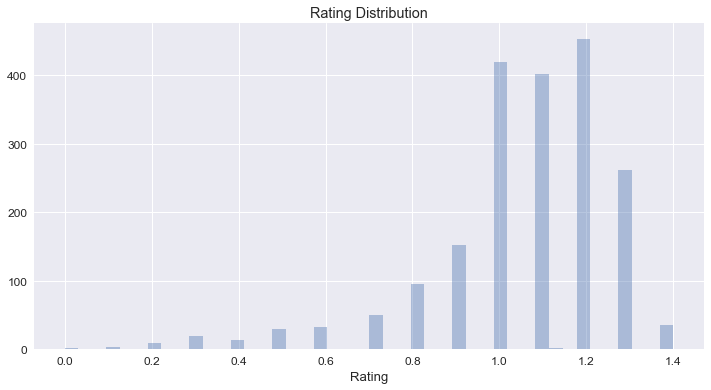

In [116]:
plt.figure(figsize=(12,6))
fig = sns.distplot(df[remove_outliers(df, 'rating')]['rating'], kde=False)
fig.set_title('Rating Distribution')
fig.set_xlabel('Rating')

<font color='blue'>
In most cases the ratings (obtained by rating_numerator / rating_denominator) are between 1.0 and 1.2, wich indicates there is a certain pattern of ratings, despite the fact that it's a humorously evaluation - ***they're good dogs, Brent*** - and ratings like 42 and 177.60 are allowed. <br>When removing those outliers that pattern can be seen more easily.
</font>

Text(0,0.5,'Tweet Count')

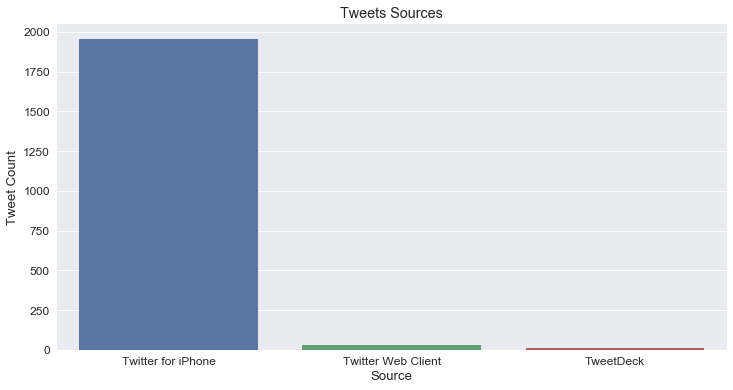

In [117]:
# Tweet sources distribution...
plt.figure(figsize=(12,6))
fig = sns.countplot(data=df, x='source')
fig.set_title("Tweets Sources")
fig.set_xlabel('Source')
fig.set_ylabel('Tweet Count')

<font color='blue'>
    This countplot shows that the most used source for the tweets is the **Twitter for iPhone**.
</font>    

Text(0,0.5,'Tweet Count')

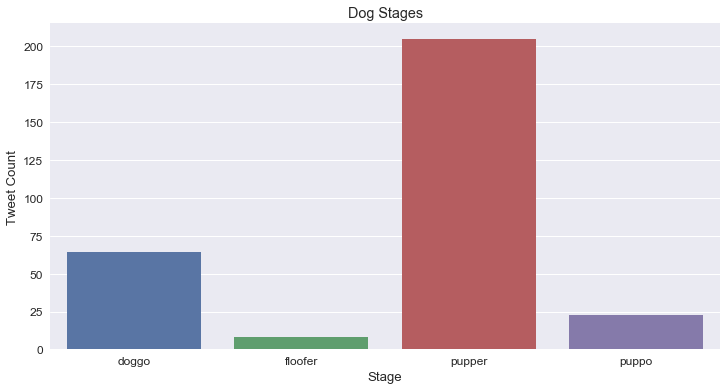

In [118]:
# Dog stages distribution..
plt.figure(figsize=(12,6))
fig = sns.countplot(data=df, x='stage')
fig.set_title('Dog Stages')
fig.set_xlabel('Stage')
fig.set_ylabel('Tweet Count')

In [119]:
favorite_by_stage = pd.DataFrame(df.groupby('stage').sum()['favorite_count'])

Text(0.5,0,'Stage')

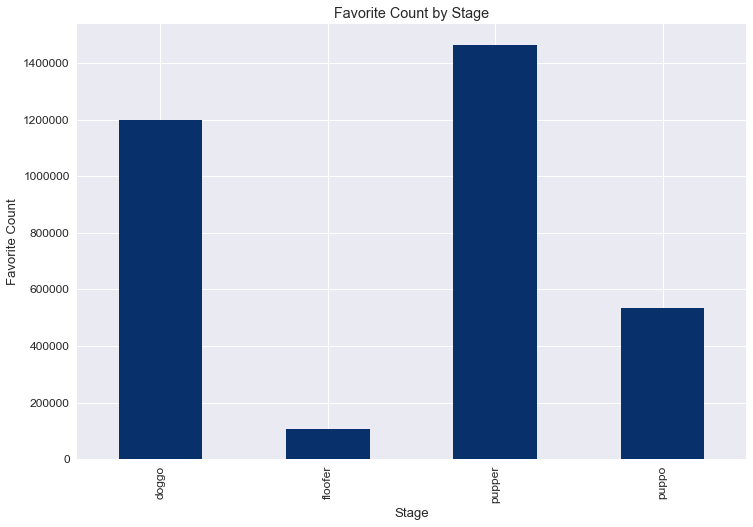

In [120]:
fig = favorite_by_stage.plot(kind='bar', figsize=(12,8), legend=False, title='Favorite Count by Stage', colormap='Blues_r')
fig.set_ylabel('Favorite Count')
fig.set_xlabel('Stage')

<font color='blue'>
    Despite the fact that aprox. 85% of the tweets dont have a stage mentioned, **pupper** seems to be the most assigned and liked (favorited) stage. Considering the definition of a **pupper**, wich includes the cute baby dogs, they would probably be at the top of the favorite count even without the "missing data" problem.
</font>    

In [121]:
favorite_by_breed = pd.DataFrame(df.groupby('breed').sum()['favorite_count'].nlargest(5))

Text(0.5,0,'Favorite Count')

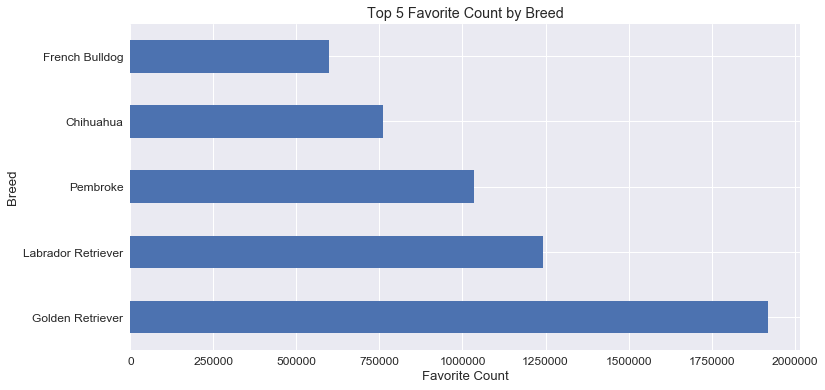

In [122]:
fig = favorite_by_breed.plot(kind='barh', figsize=(12,6), legend=False, title='Top 5 Favorite Count by Breed')
fig.set_ylabel('Breed')
fig.set_xlabel('Favorite Count')

<font color='blue'>Assuming that the predictions are correct, **Golden Retriever** is the favorite breed among the @dog_rates followers.</font>

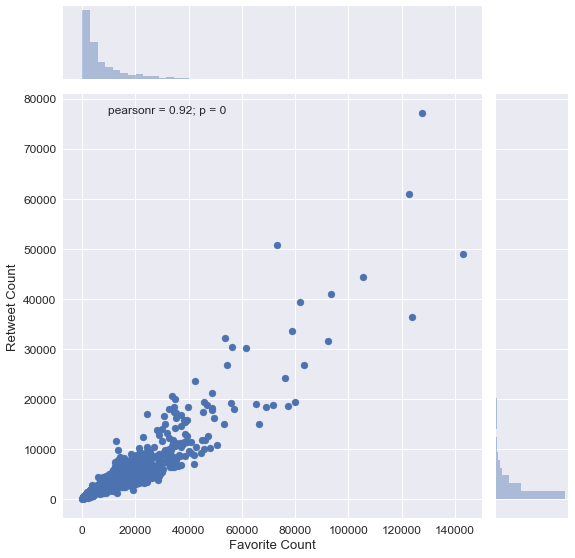

In [123]:
plt.figure(figsize=(12,6))
fig = sns.jointplot(data=df, x='favorite_count', y='retweet_count', size=8, kind='scatter')
fig.set_axis_labels('Favorite Count','Retweet Count')

<font color='blue'>Theres a correlation between the favorite count and the retweet count, wich indicates that tweets are usually  favorited and also retweeted. <br>This plot also shows that most of the tweets have around 40000 likes and 10000 retweets. </font>

In [124]:
tweets_by_month = pd.DataFrame(df.groupby(df['tweet_date'].dt.to_period("M")).count()['tweet_id'])
tweets_by_month.reset_index(inplace=True)

Text(0.5,1,'Tweets Per Month')

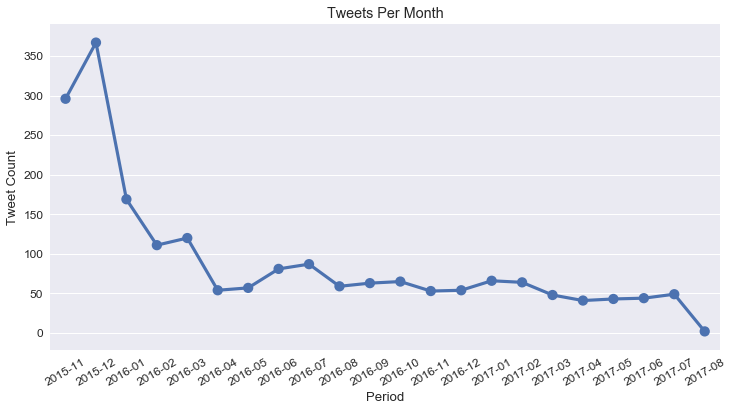

In [125]:
plt.figure(figsize=(12,6))
fig = sns.pointplot(data=tweets_by_month, x='tweet_date', y='tweet_id')
fig.set_xticklabels(fig.get_xticklabels(), rotation=30)
fig.set_xlabel("Period")
fig.set_ylabel("Tweet Count")
fig.set_title("Tweets Per Month")

In [126]:
favorites_by_month = pd.DataFrame(df.groupby(df['tweet_date'].dt.to_period("M")).sum()['favorite_count'])
favorites_by_month.reset_index(inplace=True)

Text(0.5,1,'Favorite Count Per Month')

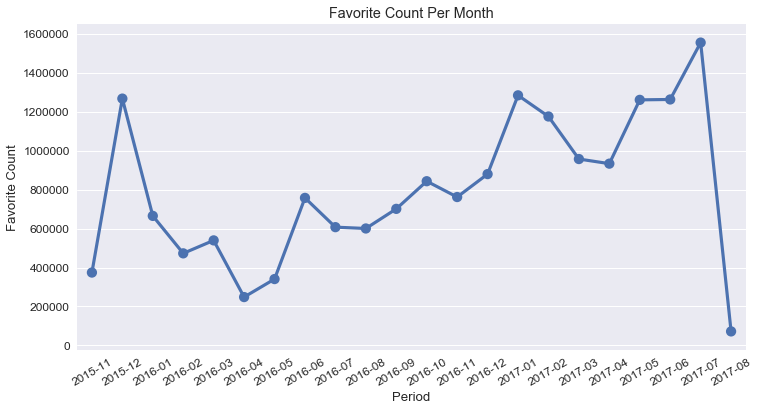

In [127]:
plt.figure(figsize=(12,6))
fig = sns.pointplot(data=favorites_by_month, x='tweet_date', y='favorite_count')
fig.set_xticklabels(fig.get_xticklabels(), rotation=30)
fig.set_xlabel("Period")
fig.set_ylabel("Favorite Count")
fig.set_title("Favorite Count Per Month")

<font color='blue'>The @dogs_rate account was created in november/2015, and until december/2015 is when the biggest amount of tweets were posted. Then a sharp drop is observed in the next 4 months with low variation until july/2017, as shown in the ** Tweets Per Month** plot. The considerable reduction in the tweet count suggest that maybe the first months were dedicated to promote the account and get followers, as the favorite count is increasing since then, according to the **Favorite Count Per Month** plot. <br>The drop observed in August/2017 is caused by incomplete data.</font>